![outliers](https://user-images.githubusercontent.com/54896849/116092848-c8a4a900-a6c3-11eb-8f72-31a01216b892.png)

```
Algorithm:
----------
If feature has outliers (check using box-plot):
    If feature follows:
        * Normal/Near-Normal Distribution 
            - Apply Standard Deviation Method (Technique 1)
                            OR
            - Apply Z-score Method (Technique 2)
            
        * Skewed Distribution
            -Apply Interquartile Range Method (Technique 3)
        
   
```

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab

# Read Dataset

In [2]:
df=pd.read_csv('titanic.csv')[['Age','Fare']]
df.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [3]:
df.shape

(891, 2)

In [4]:
df.isnull().sum()

Age     177
Fare      0
dtype: int64

In [5]:
# fill nan
df['Age']=df['Age'].fillna(df['Age'].median())

In [6]:
# create copies of dataframe
df2=df.copy()
df3=df.copy()

# Define Functions

In [7]:
# Check whether feature follows Normal/Near-Normal distribution.
# Q-Q plot

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [8]:
# Apply Technique 1 or Technique 2 if feature follows Normal/Near-Normal distribution.

def technique_1(df,feature):
    
    mean = df[feature].mean() # μ
    standard_deviation = df[feature].std() # σ
    lower_boundary = mean - 3* standard_deviation # μ-3σ
    upper_boundary = mean + 3* standard_deviation # μ+3σ
    
    return lower_boundary, upper_boundary



def technique_2(df,feature):
    
    mean = df[feature].mean() # μ
    standard_deviation = df[feature].std() # σ
    z_scores = (df[feature] - mean)/standard_deviation # (X-μ)/σ
    
    return z_scores

In [9]:
# Apply Technique 3 if feature is skewed.

def technique_3(df,feature,param=1.5): # To remove extreme outliers only set param = 3 , else = 1.5
    
    # compute 25th percentile
    lower = df[feature].quantile(0.25)
    
    # compute 75th percentile
    upper = df[feature].quantile(0.75)
    
    
    # Compute the Interquantile range (IQR) = 75th percentile - 25th percentile
    IQR = upper - lower

    # Calculate the boundaries
    lower_bridge = lower - (IQR * param) 
    upper_bridge = upper + (IQR * param)
    
    return lower_bridge, upper_bridge

# Handling Outliers

## Age

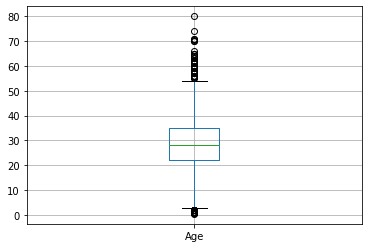

In [10]:
# Age column has outliers.

figure=df.boxplot(column="Age")

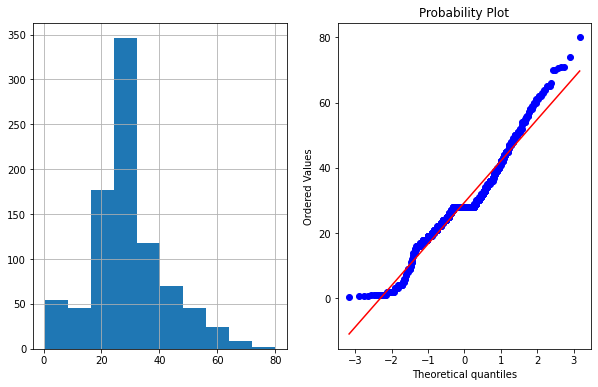

In [11]:
# Since the observed values are close to the theoretical quantiles in probability plot, 
# it means that the feature follows Near-Normal distribution.
# We can also see that directly from the histogram.

plot_data(df,'Age')

### Technique 1

In [12]:
lower_boundary, upper_boundary = technique_1(df,'Age')
print(lower_boundary,upper_boundary)

-9.697507161337093 68.42067214450208


In [13]:
# Remove outliers.
# 7 outliers were detected and removed.

df = df.loc[(df['Age']>lower_boundary) & (df['Age']<upper_boundary)]
df.shape

(884, 2)

### Technique 2

In [14]:
z_scores = technique_2(df2,'Age')
df2['z-score'] = z_scores
df2.head()

,Age,Fare,z-score
0,22.0,7.2500,-0.565419
1,38.0,71.2833,0.663488
2,26.0,7.9250,-0.258192
3,35.0,53.1000,0.433068
4,35.0,8.0500,0.433068


In [15]:
# Remove outliers.
# 7 outliers were detected and removed.

df2 = df2.loc[(df2['z-score']>-3) & (df2['z-score']<3)]
df2.shape

(884, 3)

## Fare

<AxesSubplot:>

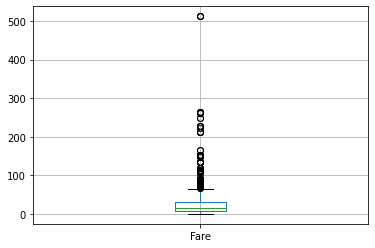

In [16]:
# Fare column has outliers.
df3.boxplot(column="Fare")

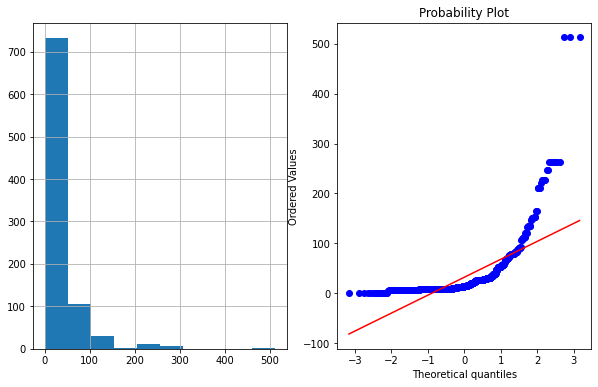

In [17]:
# Since the observed values are not close to the theoretical quantiles in probability plot, 
# it means that the feature is skewed.
# We can also see that directly from the histogram.

plot_data(df3,'Fare')

In [18]:
# Since Fare follows Skewed Distribution, apply Technique 3.

lower_bridge, upper_bridge = technique_3(df3,'Fare')
print(lower_bridge,upper_bridge)

-26.724 65.6344


In [19]:
# Remove outliers.
# 116 outliers were detected and removed.

df3 = df3.loc[(df3['Fare']>lower_bridge) & (df3['Fare']<upper_bridge)]
df3.shape

(775, 2)

# References

* https://github.com/codebasics/py/blob/master/ML/FeatureEngineering/2_outliers_z_score/2_outliers_z_score.ipynb
* https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/